##**VGG16 - Prediksi Kualitas Buah Jeruk**

###Load Data

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Menentukan path direktori gambar

train_dir = '/content/gdrive/MyDrive/dataset_orange/train'
val_dir = '/content/gdrive/MyDrive/dataset_orange/val'

path = '/content/gdrive/MyDrive/dataset_orange'

###Preprocessing

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             zoom_range=0.2,
                             horizontal_flip=True)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    shuffle=True)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    shuffle=True)

Found 700 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


###Modelling

In [32]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a sequential model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_79 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_81 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [33]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [34]:
hist = model.fit(
    train_data,
    validation_data = val_data,
    batch_size=64,
    steps_per_epoch=5,
    epochs=15)

Epoch 1/15
5/5 [==============================] - 26s 2s/step - loss: 1.2199 - accuracy: 0.4625 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 9s 2s/step - loss: 0.6988 - accuracy: 0.4375 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 7s 1s/step - loss: 0.6951 - accuracy: 0.5437 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/15
5/5 [==============================] - 16s 4s/step - loss: 0.6917 - accuracy: 0.5321 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.6940 - accuracy: 0.4872 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/15
5/5 [==============================] - 7s 1s/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/15
5/5 [=======================

###Evaluation

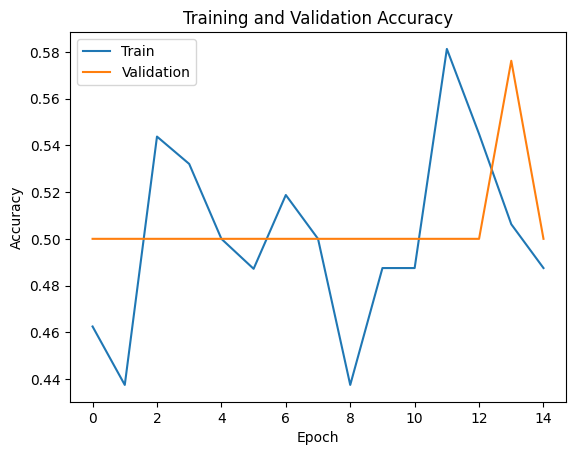

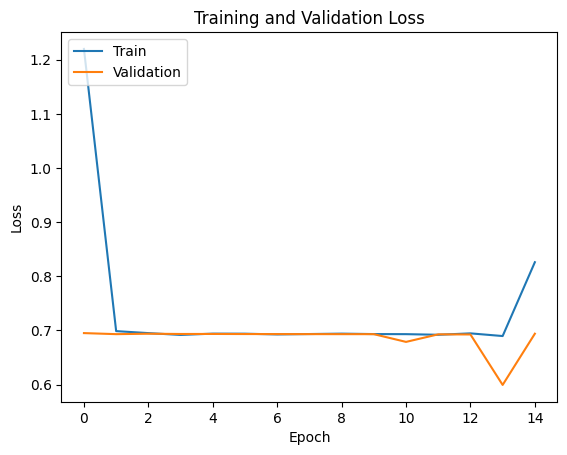

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Prediction

Saving jeruk2.jpg to jeruk2 (1).jpg
1/1 [==============================] - 0s 20ms/step
Predicted class: bad


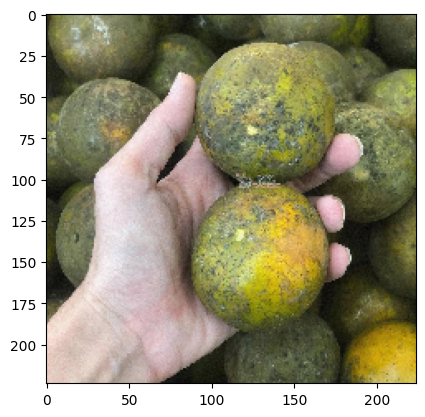

In [41]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size = (224,224))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 100)

        # Print prediction result
    predicted_class_index = np.argmax(classes)
    class_names = ['good', 'bad'] 
    predicted_class = class_names[predicted_class_index]

    print('Predicted class:', predicted_class)